# Lista 4

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## zadanie 3

In [2]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [3]:
def sampleACF(X, h):
    return sampleACVF(X, h)/sampleACVF(X, 0)

In [19]:
def teoACVF(h):
    return 4 if h==0 else 0

In [18]:
def teoACF(h):
    return 1 if h==0 else 0

In [21]:
def zad3(n,h):
    X = np.random.normal(0, 2, size = n)
    return n,h,sampleACVF(X, h), sampleACF(X, h)

In [29]:
wyniki = []
for h in list(range(-50,51)):
    for n in [1000, 10000]:
        n, h, acvf, acf = zad3(n, h)
        wyniki.append([n, h, acvf, teoACVF(h), acf, teoACF(h)])
        
df = pd.DataFrame(wyniki, columns = ['n', 'h', 'sampleACVF', 'True ACVF', 'sampleACF', 'True ACF'])
df

,n,h,sampleACVF,True ACVF,sampleACF,True ACF
0,1000,-50,0.143643,0,0.036104,0
1,10000,-50,0.028747,0,0.007214,0
2,1000,-49,-0.224969,0,-0.054344,0
3,10000,-49,-0.026188,0,-0.006591,0
4,1000,-48,-0.005706,0,-0.001465,0
...,...,...,...,...,...,...
197,10000,48,0.004640,0,0.001177,0
198,1000,49,-0.033454,0,-0.008184,0
199,10000,49,-0.006799,0,-0.001690,0
200,1000,50,0.108942,0,0.028813,0


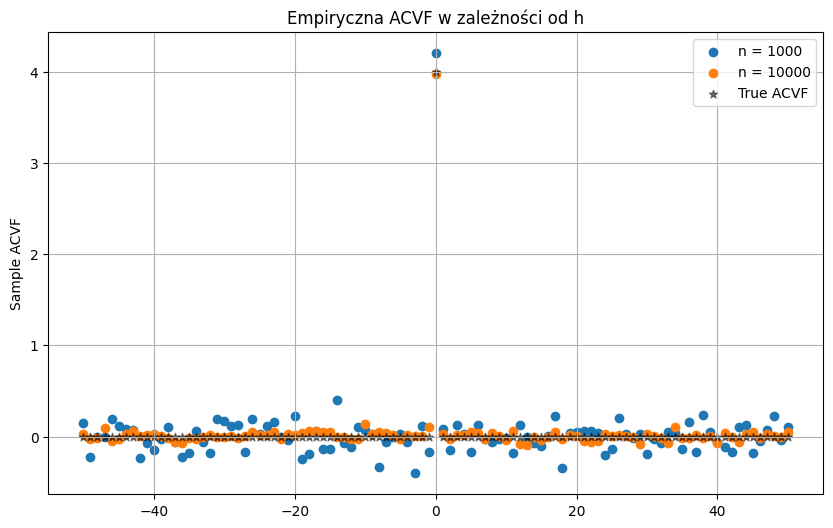

In [83]:
plt.figure(figsize=(10, 6))
for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACVF'], marker='o', label=f'n = {n}')
plt.scatter(subset['h'], subset['True ACVF'], color = 'k', alpha=0.5, marker='*', label = 'True ACVF')

# plt.axhline(0, color='red', linestyle='dashed', linewidth=0.8, label = 'teoretyczna')  # Linia dla ACVF = 0
# plt.axhline(4, color='red', linestyle='dashed', linewidth=0.8, label = 'teoretyczna')  # Linia dla ACVF = 4
plt.ylabel('Sample ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

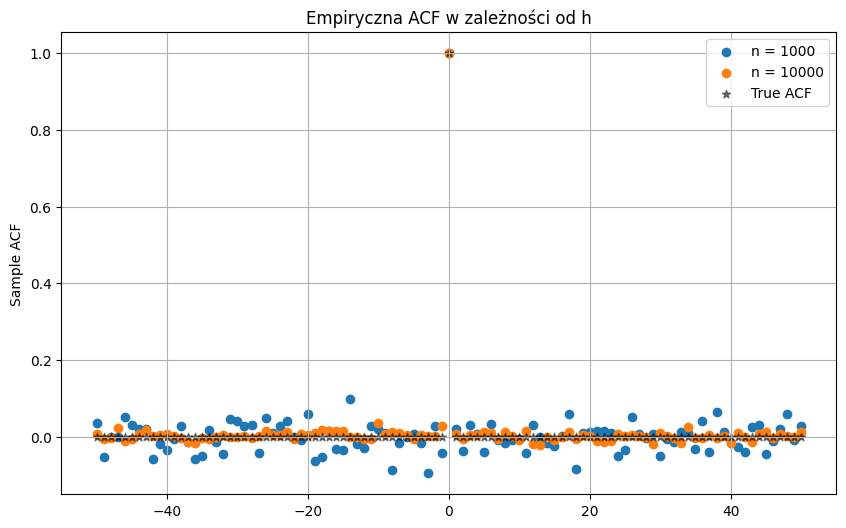

In [84]:
plt.figure(figsize=(10, 6))
for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACF'], marker='o', label=f'n = {n}')
plt.scatter(subset['h'], subset['True ACF'], color = 'k', alpha=0.5, marker='*', label = 'True ACF')

# plt.axhline(0, color='red', linestyle='dashed', linewidth=0.8) 
# plt.axhline(1, color='red', linestyle='dashed', linewidth=0.8) 
plt.ylabel('Sample ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

## zadanie 4

In [59]:
def ma1teoACVF(h, sigma, theta):
    if h == 0:
        return sigma**2*(1+theta**2)
    if abs(h) == 1:
        return theta*sigma**2
    else:
        return 0

In [9]:
def ma1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [49]:
def zad3(n, h, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    empACF = sampleACF(X, h)
    trueACF = ma1teoACF(h, theta)
    return n,h,sampleACVF(X,h),ma1teoACVF(h, sigma, theta), empACF,trueACF
    

In [60]:
sigma = 1
theta = 2
wyniki2 = []
for h in list(range(-50,51)):
    for n in [1000, 10000]:
        wyniki2.append(zad3(n,h, sigma, theta))
        
df2 = pd.DataFrame(wyniki2, columns = ['n', 'h', 'sampleACVF','True ACVF', 'sampleACF', 'True ACF'])


In [90]:
df2['True ACVF'].unique()

array([0, 2, 5], dtype=int64)

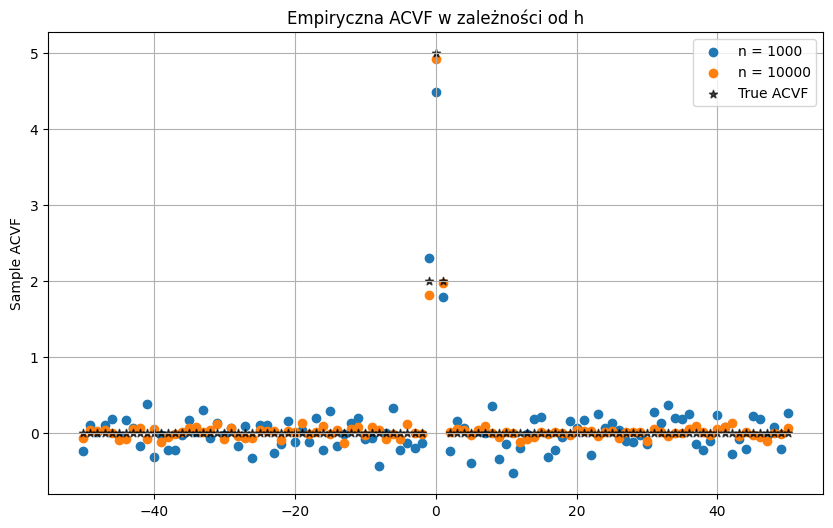

In [88]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACVF'], marker='o', label=f'n = {n}')
plt.scatter(subset['h'], subset['True ACVF'], color = 'k', alpha= 0.7, marker='*', label = 'True ACVF')
# acfs = df2['True ACVF'].unique()
# for value in acfs:
#     plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACVF={value}')

plt.ylabel('Sample ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

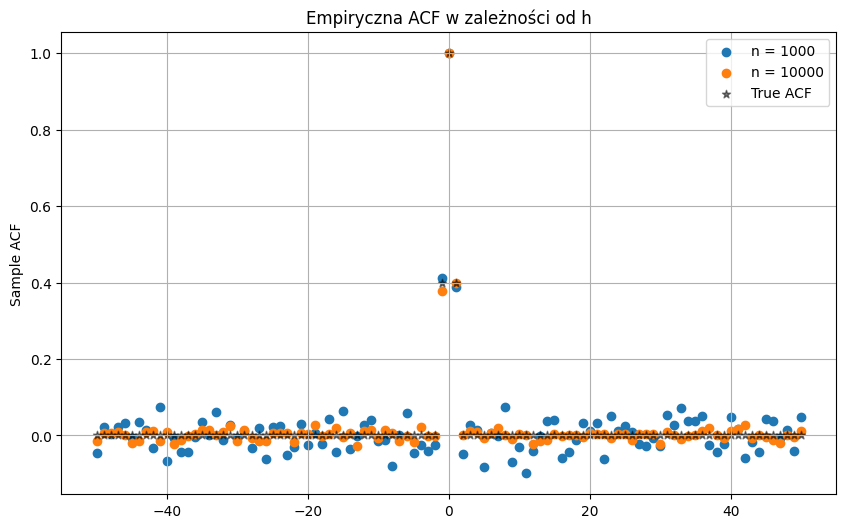

In [89]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACF'], marker='o', label=f'n = {n}')
plt.scatter(subset['h'], subset['True ACF'], color = 'k', alpha= 0.5, marker='*', label = 'True ACF')
# acfs = df2['True ACF'].unique()
# for value in acfs:
#     plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACF={value}')

plt.ylabel('Sample ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

## zadanie 5

In [9]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [7]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [8]:
def sampleACF(X, h):
    return sampleACVF(X, h)/sampleACVF(X, 0)

In [13]:
def ma1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [5]:
N = 1000
theta = 0.5
mu = 0
sigma = 2
a = 15
p = 0.01

In [11]:
def gen_noisy_ma1(theta,a, p, n):
    Z = np.random.normal(0,1, size = n+1)
    ksi = np.array(np.random.choice([a, -a, 0], size=n, p=[p / 2, p / 2, 1 - p]))
    X = Z[1:] + theta*Z[:-1] + ksi
    return X

In [31]:
def trimmed_acvf(x, h, alpha=0.1):
    n = len(x)
    x_mean = np.mean(x)
    residuals = (x[:n - h] - x_mean) * (x[h:] - x_mean)
    trimmed = np.sort(residuals)[int(alpha * len(residuals)) : int((1 - alpha) * len(residuals))]
    return np.mean(trimmed)

In [33]:
def zad5(n,a,p,theta):
    X = gen_noisy_ma1(theta,a,p,n)
    return h, a, p, sampleACF(X,h), ma1teoACF(h, theta), trimmed_acvf(X,h)/trimmed_acvf(X,0)
    

In [55]:
def plotowanie(df):
    plt.figure(figsize=(10, 6))
    for a in sorted(df['a'].unique()):
        subset = df[df['a'] == a]
        plt.scatter(subset['h'], subset['noisyACF'], marker='o', label=f'basic')
        plt.scatter(subset['h'], subset['trimmed ACF'], marker='o', color = 'red', label=f'trimmed')
    plt.vlines(x=subset['h'], ymin=0, ymax=subset['True ACF'], color = 'orange', label = 'True ACF')
    # acfs = df2['True ACF'].unique()
    # for value in acfs:
    #     plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACF={value}')

    plt.ylabel('Sample ACF')
    plt.title(f'Empiryczna ACF w zależności od h, a = {df.a[0]}, p = {df.p[0]}')
    plt.legend()
    plt.grid()
    plt.show()

In [53]:
wyniki3 = []
for h in list(range(0,11)):
    for a in [15]:
        for p in [0.01]:
            n=N
            wyniki3.append(zad5(n,a,p,theta))
        
df5 = pd.DataFrame(wyniki3, columns = ['h', 'a','p', 'noisyACF','True ACF','trimmed ACF'])


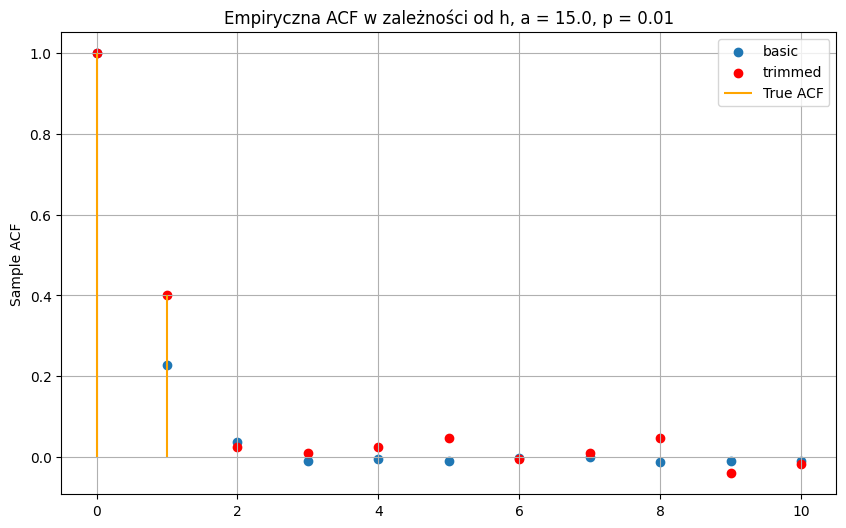

In [54]:
plotowanie(df5)

In [42]:
wyniki3a = []
for h in list(range(0,11)):
    a = 10
    p = 0.001
    n=N
    wyniki3a.append(zad5(n,a,p,theta))
        
df3a = pd.DataFrame(wyniki3a, columns = ['h', 'a','p', 'noisyACF','True ACF','trimmed ACF'])

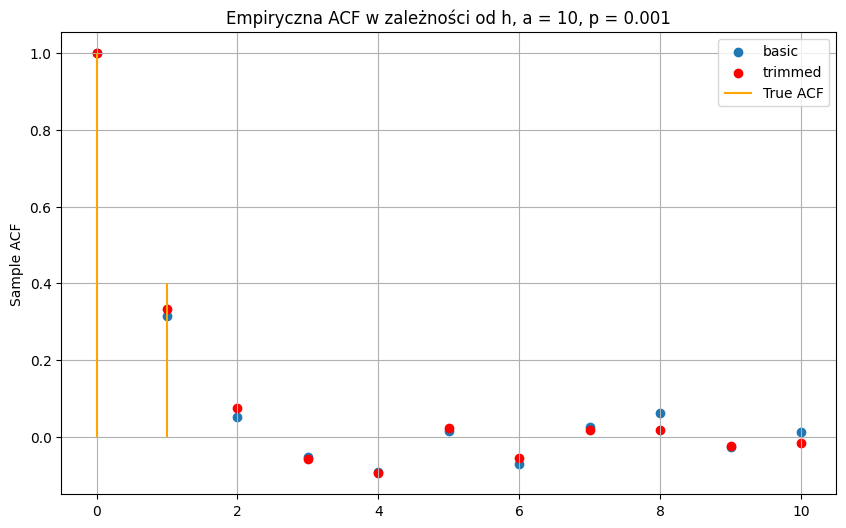

In [56]:
plotowanie(df3a)

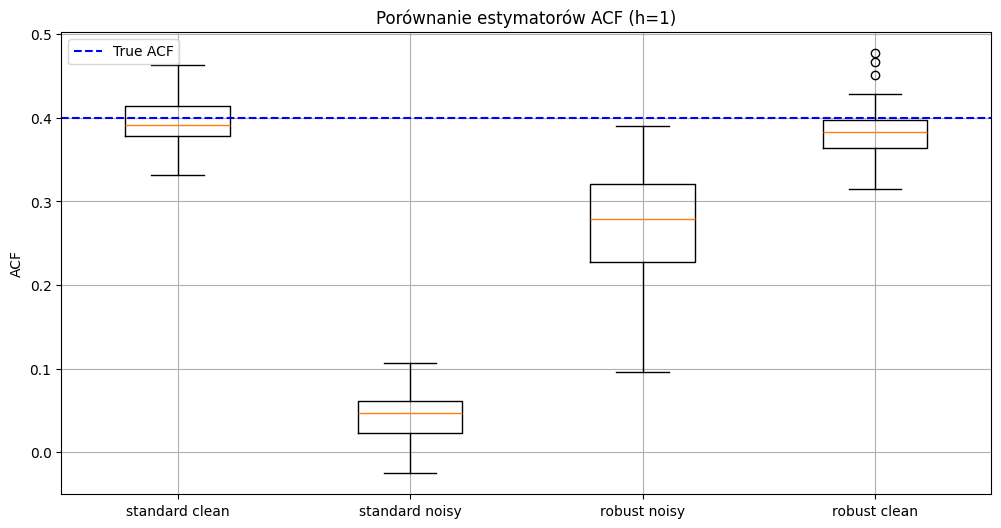

In [60]:
mc = 100
n = 1000
h = 1
p = 0.1
a = 10
alpha = 0.1
basic_clean = []
basic_noisy = []
robust_clean = []
robust_noisy = []
for i in range(mc):
    Xclean = gen_noisy_ma1(theta,0,0,n)
    Xnoisy = gen_noisy_ma1(theta,a,p,n)
    basic_clean.append(sampleACF(Xclean,h))
    robust_clean.append(trimmed_acvf(Xclean,h,alpha)/trimmed_acvf(Xclean,0,alpha))
    basic_noisy.append(sampleACF(Xnoisy,h))
    robust_noisy.append(trimmed_acvf(Xnoisy,h,alpha)/trimmed_acvf(Xnoisy,0,alpha))
teo = ma1teoACF(h, theta)
plt.figure(figsize=(12,6))
plt.boxplot(
    [basic_clean, basic_noisy, robust_noisy, robust_clean], labels= ['standard clean', 'standard noisy', 'robust noisy','robust clean']
)
plt.axhline(y=teo, color="blue", linestyle="--", label="True ACF")
plt.title("Porównanie estymatorów ACF (h=1)")
plt.ylabel("ACF")
plt.legend()
plt.grid()
plt.show()
    